In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('T20 International Dataset.csv')
df.head()

,ID,powerPlay,AverageScore,battingTeam,bowlingTeam,city,delivery_left,score,CurrentRunRate,wicketsLeft,Run_In_Last5,Wickets_In_Last5,Final_Score,innings
0,32266,0,153.142857,New Zealand,Sri Lanka,Colombo,51,94,8.173913,9,42,1,170,1
1,47001,0,158.307692,England,South Africa,Durban,0,204,10.200000,3,79,2,204,1
2,45705,0,158.307692,New Zealand,South Africa,Durban,23,79,4.886598,2,25,1,86,1
3,59293,1,149.000000,South Africa,New Zealand,Chattogram,85,39,6.685714,8,37,2,170,1
4,174494,0,137.000000,Pakistan,Sri Lanka,King City,79,44,6.439024,8,36,2,141,2


DATA CLEANING

In [5]:
df1 = df.drop(['ID','powerPlay','battingTeam','bowlingTeam','city'],axis=1)
df1.head()

,AverageScore,delivery_left,score,CurrentRunRate,wicketsLeft,Run_In_Last5,Wickets_In_Last5,Final_Score,innings
0,153.142857,51,94,8.173913,9,42,1,170,1
1,158.307692,0,204,10.200000,3,79,2,204,1
2,158.307692,23,79,4.886598,2,25,1,86,1
3,149.000000,85,39,6.685714,8,37,2,170,1
4,137.000000,79,44,6.439024,8,36,2,141,2


In [6]:
df1.shape

(131624, 9)

In [ ]:
df2 = df1[df1['innings'] == 1].reset_index(drop=True)
df2.shape

(69967, 9)

In [11]:
df2.head()

,AverageScore,delivery_left,score,CurrentRunRate,wicketsLeft,Run_In_Last5,Wickets_In_Last5,Final_Score,innings
0,153.142857,51,94,8.173913,9,42,1,170,1
1,158.307692,0,204,10.200000,3,79,2,204,1
2,158.307692,23,79,4.886598,2,25,1,86,1
3,149.000000,85,39,6.685714,8,37,2,170,1
4,157.214286,16,95,5.480769,3,31,1,116,1


In [12]:
df2['innings'].unique()

array([1])

In [13]:
df2 = df2.drop('innings', axis=1)
df2.head()

,AverageScore,delivery_left,score,CurrentRunRate,wicketsLeft,Run_In_Last5,Wickets_In_Last5,Final_Score
0,153.142857,51,94,8.173913,9,42,1,170
1,158.307692,0,204,10.200000,3,79,2,204
2,158.307692,23,79,4.886598,2,25,1,86
3,149.000000,85,39,6.685714,8,37,2,170
4,157.214286,16,95,5.480769,3,31,1,116


In [14]:
df2.shape

(69967, 8)

In [15]:
df2.isnull().sum()

AverageScore        0
delivery_left       0
score               0
CurrentRunRate      0
wicketsLeft         0
Run_In_Last5        0
Wickets_In_Last5    0
Final_Score         0
dtype: int64

In [16]:
df2.describe()

,AverageScore,delivery_left,score,CurrentRunRate,wicketsLeft,Run_In_Last5,Wickets_In_Last5,Final_Score
count,69967.000000,69967.000000,69967.000000,69967.000000,69967.000000,69967.000000,69967.000000,69967.000000
mean,157.109059,45.958237,94.048952,7.573992,6.726886,38.429202,1.441294,159.422942
std,15.645552,26.528155,41.706481,1.772156,2.024674,11.828074,1.096276,33.226402
min,85.000000,0.000000,8.000000,1.600000,0.000000,8.000000,0.000000,39.000000
25%,146.416667,23.000000,61.000000,6.333333,5.000000,30.000000,1.000000,138.000000
50%,156.000000,46.000000,89.000000,7.500000,7.000000,37.000000,1.000000,159.000000
75%,168.666667,69.000000,123.000000,8.672269,8.000000,46.000000,2.000000,182.000000
max,219.000000,98.000000,278.000000,16.600000,10.000000,90.000000,8.000000,278.000000


In [17]:
df2.dtypes

AverageScore        float64
delivery_left         int64
score                 int64
CurrentRunRate      float64
wicketsLeft           int64
Run_In_Last5          int64
Wickets_In_Last5      int64
Final_Score           int64
dtype: object

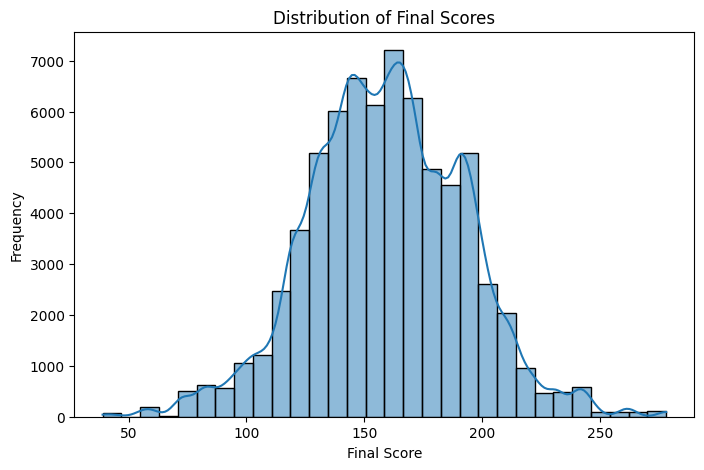

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(df2['Final_Score'], bins=30, kde=True)
plt.title("Distribution of Final Scores")
plt.xlabel("Final Score")
plt.ylabel("Frequency")
plt.show()

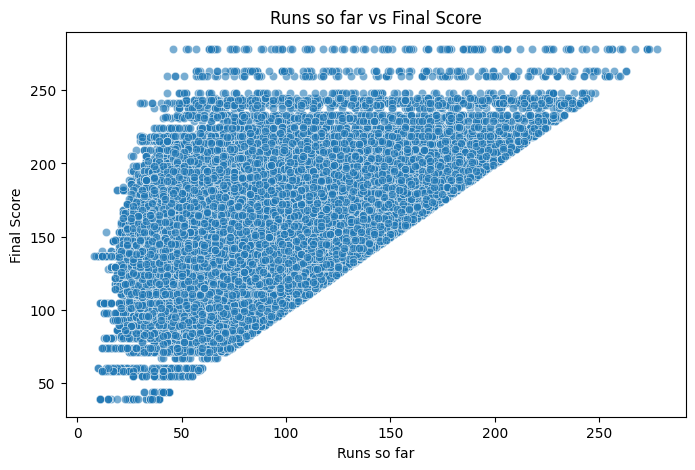

In [32]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df2['score'], y=df2['Final_Score'], alpha=0.6)
plt.title("Runs so far vs Final Score")
plt.xlabel("Runs so far")
plt.ylabel("Final Score")
plt.show()

Treating outliers

In [43]:
df3 = df2[df2['Final_Score']<70]

In [45]:
df3.head()

,AverageScore,delivery_left,score,CurrentRunRate,wicketsLeft,Run_In_Last5,Wickets_In_Last5,Final_Score
22,149.000000,57,39,3.714286,0,28,6,39
65,131.666667,57,36,3.428571,3,20,1,58
99,138.162791,42,50,3.846154,1,9,4,55
249,138.162791,65,42,4.581818,5,19,3,55
424,146.142857,70,43,5.160000,3,23,4,44


In [46]:
df4 = df2[df2['Final_Score'] >= 70].reset_index(drop=True)

In [47]:
df4.shape

(69686, 8)

In [48]:
df4.head()

,AverageScore,delivery_left,score,CurrentRunRate,wicketsLeft,Run_In_Last5,Wickets_In_Last5,Final_Score
0,153.142857,51,94,8.173913,9,42,1,170
1,158.307692,0,204,10.200000,3,79,2,204
2,158.307692,23,79,4.886598,2,25,1,86
3,149.000000,85,39,6.685714,8,37,2,170
4,157.214286,16,95,5.480769,3,31,1,116


In [53]:
print(df4['Final_Score'].min())
print(df4['Final_Score'].max())

print(df4.shape)


71
278
(69686, 8)


In [59]:
print((df4['Final_Score'] >= 270).sum())

105


In [60]:
df5 = df4[df4['Final_Score'] < 270].reset_index(drop=True)

In [61]:
df5.shape

(69581, 8)

In [62]:
print(df5['Final_Score'].min())
print(df5['Final_Score'].max())

71
263


In [65]:
df5.head()

,AverageScore,delivery_left,score,CurrentRunRate,wicketsLeft,Run_In_Last5,Wickets_In_Last5,Final_Score
0,153.142857,51,94,8.173913,9,42,1,170
1,158.307692,0,204,10.200000,3,79,2,204
2,158.307692,23,79,4.886598,2,25,1,86
3,149.000000,85,39,6.685714,8,37,2,170
4,157.214286,16,95,5.480769,3,31,1,116


In [68]:
df5.isnull().sum()

AverageScore        0
delivery_left       0
score               0
CurrentRunRate      0
wicketsLeft         0
Run_In_Last5        0
Wickets_In_Last5    0
Final_Score         0
dtype: int64

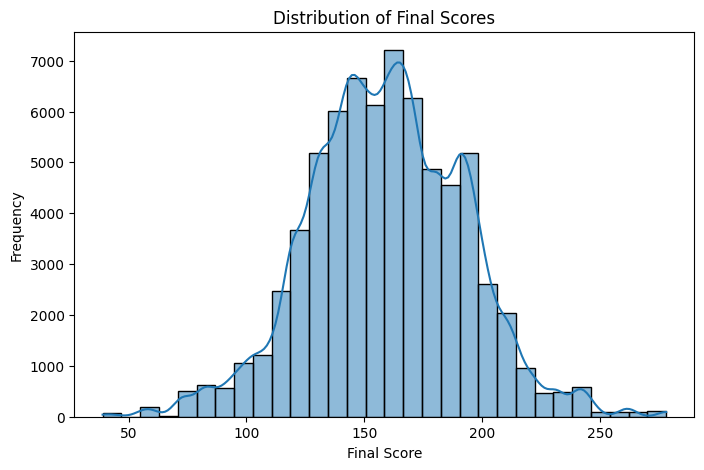

In [63]:
plt.figure(figsize=(8,5))
sns.histplot(df2['Final_Score'], bins=30, kde=True)
plt.title("Distribution of Final Scores")
plt.xlabel("Final Score")
plt.ylabel("Frequency")
plt.show()

Model training

In [64]:
from sklearn.model_selection import train_test_split

In [70]:
X = df5.drop('Final_Score', axis=1)
y = df5['Final_Score']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit

In [80]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error', 'friedman_mse'],
                'splitter': ['best','random'],
                'max_depth': [5, 10, 15, None]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 100, 200],
                'max_depth': [10, 20, None]
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, n_jobs=-1)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


In [81]:
results = find_best_model_using_gridsearchcv(X, y)
results

,model,best_score,best_params
0,linear_regression,0.682236,{'fit_intercept': True}
1,decision_tree,0.857062,"{'criterion': 'squared_error', 'max_depth': No..."
2,random_forest,0.928151,"{'max_depth': None, 'n_estimators': 200}"


From this we can say all three works good

But the random forest regressor works best so I'll train model using this with respective parameters

In [83]:
model = RandomForestRegressor()


In [84]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [85]:
model.score(X_test,y_test)

0.9269779289500446

Now let's import this model for backend api and frontend display

In [86]:
import pickle
with open('cricscore_predictor.pickle', 'wb') as f:
    pickle.dump(model, f)

Exporting the columns on which model trained

In [87]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))